In [2]:
import pandas as pd
import numpy as np

# Dataset 1

In [3]:
# Si no os aparece esta dirección, id a la carpeta compartida de PM, os ponéis encima de AB Data, click derecho,
# "Organitza", "Afegeix una dreçera", "La Meva Unitat", así tenemos todos los datos en la misma carpeta sin tener que
# hacer duplicados de los datasets de 4gb ni nada.

file_path = '/Users/nicolasvila/Downloads/dataset1_activitat_eco_v2.csv'
original_data = pd.read_csv(file_path)

In [4]:
data = original_data.copy()

In [5]:
data.head()

,Districte/Distrito/District,Codi postal/Código postal/Postcode,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Tipus d'activitat econòmica/Tipo de actividad económica/Type of economic activity,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated Consumption (L/day)
0,NaN,8001,BARCELONA,2019-01-01,Industrial/Industrial/Industrial,* d'altres categories/ * de otras categorías/ ...,1,1.0
1,NaN,8001,BARCELONA,2019-01-01,Industrial/Industrial/Industrial,<NULL>/ <NULL>/ <NULL>,1,0.0
2,NaN,8001,BARCELONA,2019-01-02,Industrial/Industrial/Industrial,* d'altres categories/ * de otras categorías/ ...,1,84.0
3,NaN,8001,BARCELONA,2019-01-02,Industrial/Industrial/Industrial,<NULL>/ <NULL>/ <NULL>,1,0.0
4,NaN,8001,BARCELONA,2019-01-03,Industrial/Industrial/Industrial,* d'altres categories/ * de otras categorías/ ...,1,134.0


In [6]:
# Rename
new_column_names = {
    "Diàmetre (mm)/Diámetro (mm)/Diameter (mm)": "Diameter (mm)",
    "Ús/Uso/Use": "Use",
    "Tipus d'activitat econòmica/Tipo de actividad económica/Type of economic activity": "Type of economic activity",
    "Data/Fecha/Date": "Date",
    "Hora/Hora/Time": "Time",
    "Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated Consumption (L/day)": "Consumption (L/Day)",
    "Districte/Distrito/District": "District",
    "Nombre de comptadors/Número de contadores/Number of meters": "Number of meters",
    "Municipi/Municipio/Municipality": "Municipality",
    "Codi postal/Código postal/Postcode": "Postcode",
    "Secció Censal/Sección censal/Census section": "Census section"
}
data = data.rename(columns=new_column_names)
data = data[data['Municipality'] == 'BARCELONA']
data['Use'] = data['Use'].str.split('/').str[2]
data['Type of economic activity'] = data['Type of economic activity'].str.split('/').str[2].str.replace('*', '')
columns_to_replace = ['Type of economic activity', 'Use', 'Number of meters', 'Consumption (L/Day)']
data.replace(['NaN', ' <NULL>'], np.nan, inplace=True)
# NULLS
#data = data[data['Consumption (L/Day)'] == 'NaN']
#data = data[data['Diameter (mm)'] != 0]
#display(data.isnull().sum())

display(data.head(5))
display(data.tail(5))

,District,Postcode,Municipality,Date,Use,Type of economic activity,Number of meters,Consumption (L/Day)
0,NaN,8001,BARCELONA,2019-01-01,Industrial,from other categories,1,1.0
1,NaN,8001,BARCELONA,2019-01-01,Industrial,NaN,1,0.0
2,NaN,8001,BARCELONA,2019-01-02,Industrial,from other categories,1,84.0
3,NaN,8001,BARCELONA,2019-01-02,Industrial,NaN,1,0.0
4,NaN,8001,BARCELONA,2019-01-03,Industrial,from other categories,1,134.0


,District,Postcode,Municipality,Date,Use,Type of economic activity,Number of meters,Consumption (L/Day)
15050749,10.0,8041,BARCELONA,2022-12-31,Industrial,of industrial premises and other rentals,1,12786.0
15050750,10.0,8041,BARCELONA,2022-12-31,Industrial,sports,1,27120.0
15050751,10.0,8041,BARCELONA,2022-12-31,Industrial,NaN,1,0.0
15050752,10.0,8041,BARCELONA,2022-12-31,Industrial,PREMISES CLOSED,1,156.0
15050753,NaN,8031,BARCELONA,2022-03-19,Industrial,NaN,4,0.0


In [7]:
nan_counts = data.isna().sum()
print(nan_counts)

District                     249019
Postcode                          0
Municipality                      0
Date                              0
Use                               0
Type of economic activity    216933
Number of meters                  0
Consumption (L/Day)               0
dtype: int64


In [10]:
data = data.dropna(subset=['Type of economic activity'])
nan_counts = data.isna().sum()
print(nan_counts)

Postcode                     0
Municipality                 0
Date                         0
Use                          0
Type of economic activity    0
Number of meters             0
Consumption (L/Day)          0
dtype: int64


In [9]:
data = data.drop(['District'], axis=1)
nan_counts = data.isna().sum()
print(nan_counts)

Postcode                          0
Municipality                      0
Date                              0
Use                               0
Type of economic activity    216933
Number of meters                  0
Consumption (L/Day)               0
dtype: int64


In [ ]:
nan_counts = data.isna().sum()
print(nan_counts)

In [11]:
data.head()

,Postcode,Municipality,Date,Use,Type of economic activity,Number of meters,Consumption (L/Day)
0,8001,BARCELONA,2019-01-01,Industrial,from other categories,1,1.0
2,8001,BARCELONA,2019-01-02,Industrial,from other categories,1,84.0
4,8001,BARCELONA,2019-01-03,Industrial,from other categories,1,134.0
6,8001,BARCELONA,2019-01-04,Industrial,from other categories,1,179.0
8,8001,BARCELONA,2019-01-05,Industrial,from other categories,1,180.0


In [12]:
print(len(data))

14833821


In [14]:
data.to_csv('barcelona.csv', index=False)

## **Data Cleaning**

### Missing Values Imputation:

- Missing Census/ District / Postcode but Municipality is available, choose most common instance within that Municipality. Same for any combination where we can guess location somehow

- Missing numerical values: Expectation Maximization algorithm (what would be the most likely data)

                             Type of economic activity  Probability
274                            * from other categories     0.044901
275                         COMMUNICATION EMA RATE C1A     0.032850
276                       * Collective urban transport     0.028084
277                               In hotels and motels     0.025517
278   * Complete construction, repair and conservation     0.022443
279             * From books, newspapers and magazines     0.022443
280       * cleaning streets, public roads and gardens     0.022443
281               * of sports shows by Federations Esp     0.022443
282   * in self-service or mixed with surface area ...     0.022443
283        * of high school, FP University orientation     0.022443
284   * storage and custody of vehicles in parking ...     0.022443
285                            In hostels and pensions     0.022443
286      POLITICAL PARTIES, ASSOCIATIONS, NGOs, ETC...     0.022443
287                                    PREMISES 

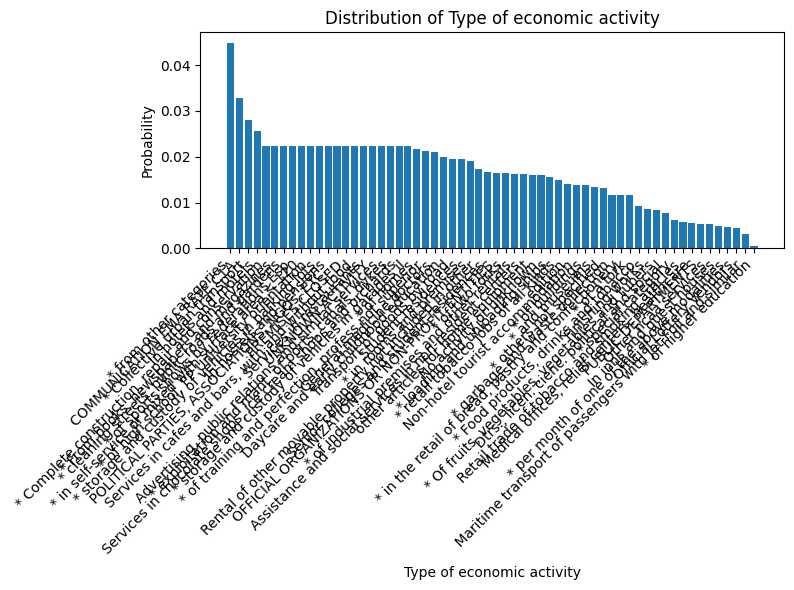

In [37]:
# Assuming you have already grouped the data and stored it in 'grouped_probs' DataFrame
# grouped_probs = ...
import matplotlib.pyplot as plt
# Define the specific combination of values for the other fields
specific_combination = {
    'Postcode': 8001,
    'Municipality': 'BARCELONA',
    'Use': 'Industrial',
}
grouped_probs = data.groupby(['Postcode', 'Municipality', 'Use'])['Type of economic activity'].value_counts(normalize=True).reset_index(name='Probability')
# Filter the grouped_probs DataFrame for the specific combination of values
subset = grouped_probs[
    (grouped_probs['Postcode'] == specific_combination['Postcode']) &
    (grouped_probs['Municipality'] == specific_combination['Municipality']) &
    (grouped_probs['Use'] == specific_combination['Use']) 
]

# Print the distribution of 'Type of economic activity' for the specific combination
print(subset[['Type of economic activity', 'Probability']])

plt.figure(figsize=(8, 6))
plt.bar(subset['Type of economic activity'], subset['Probability'])
plt.xlabel('Type of economic activity')
plt.ylabel('Probability')
plt.title('Distribution of Type of economic activity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [47]:
random_subset = data.sample(n=300000, random_state=42)

In [48]:
nan_counts = random_subset.isna().sum()


print(nan_counts)
random_subset.head()


Postcode                        0
Municipality                    0
Date                            0
Use                             0
Type of economic activity    4480
Number of meters                0
Consumption (L/Day)             0
dtype: int64


,Postcode,Municipality,Date,Use,Type of economic activity,Number of meters,Consumption (L/Day)
15310463,8850,GAVA,2021-12-13,Commercial,* placement and supply of personnel,2,419.0
19968659,8980,SANT FELIU LL.,2020-01-02,Commercial,Health technical assistants and physiotherapi...,1,34.0
3065217,8011,BARCELONA,2022-11-25,Commercial,"* jewellery, watches, silverware and bijouterie",3,138.0
14139161,8019,BARCELONA,2022-04-10,Commercial,* photographic,1,0.0
16338995,8907,L'HOSPITALET LLOBR.,2019-04-23,Industrial,* retail accessories and spare parts eg,1,154.0


In [49]:
grouped_probs = random_subset.groupby(['Postcode', 'Municipality', 'Use'])['Type of economic activity'].value_counts(normalize=True).reset_index(name='Probability')

grouped_probs_pm = random_subset.groupby(['Postcode', 'Municipality'])['Type of economic activity'].value_counts(normalize=True).reset_index(name='Probability')
def impute_type_of_activity(row):
    if pd.isnull(row['Type of economic activity']):
        # Filter the grouped probabilities for the specific combination of values in the row
        subset = grouped_probs[
            (grouped_probs['Postcode'] == row['Postcode']) &
            (grouped_probs['Municipality'] == row['Municipality']) &
            (grouped_probs['Use'] == row['Use'])
        ]
        if not subset.empty:
            # Sample 'Type of economic activity' based on probabilities for the specific combination
            return np.random.choice(subset['Type of economic activity'], p=subset['Probability'].values)
        else:
            subset = grouped_probs_pm[
                (grouped_probs_pm['Postcode'] == row['Postcode']) &
                (grouped_probs_pm['Municipality'] == row['Municipality'])]
            if not subset.empty:
                # Sample 'Type of economic activity' based on probabilities for the specific combination
                return np.random.choice(subset['Type of economic activity'], p=subset['Probability'].values)
            
    return row['Type of economic activity']

# Apply the imputation function to fill missing values in 'Type of economic activity' column
random_subset['Type of economic activity'] = random_subset.apply(impute_type_of_activity, axis=1)


In [50]:
nan_counts = random_subset.isna().sum()


print(nan_counts)
random_subset.head()

Postcode                     0
Municipality                 0
Date                         0
Use                          0
Type of economic activity    0
Number of meters             0
Consumption (L/Day)          0
dtype: int64


,Postcode,Municipality,Date,Use,Type of economic activity,Number of meters,Consumption (L/Day)
15310463,8850,GAVA,2021-12-13,Commercial,* placement and supply of personnel,2,419.0
19968659,8980,SANT FELIU LL.,2020-01-02,Commercial,Health technical assistants and physiotherapi...,1,34.0
3065217,8011,BARCELONA,2022-11-25,Commercial,"* jewellery, watches, silverware and bijouterie",3,138.0
14139161,8019,BARCELONA,2022-04-10,Commercial,* photographic,1,0.0
16338995,8907,L'HOSPITALET LLOBR.,2019-04-23,Industrial,* retail accessories and spare parts eg,1,154.0


## Dataset Preparation for anomaly detection

### Method 1: LSTM

# **Dataset 2**

In [116]:
file_path = '/Users/nvila/Downloads/dataset2_v2.csv'
data = pd.read_csv(file_path)

In [118]:
new_column_names = {
    "Diàmetre (mm)/Diámetro (mm)/Diameter (mm)": "Diameter (mm)",
    "Ús/Uso/Use": "Use",
    "Tipus d'activitat econòmica/Tipo de actividad económica/Type of economic activity": "Type of economic activity",
    "Data/Fecha/Date": "Date",
    "Hora/Hora/Time": "Time",
    "Consum (L/h)/Consumo (L/h)/Consumption (L/h)": "Consumption (L/h)",
    "Districte/Distrito/District": "District",
    "Nombre de comptadors/Número de contadores/Number of meters": "Number of meters",
    "Municipi/Municipio/Municipality": "Municipality",
    "Codi postal/Código postal/Postcode": "Postcode",
    "Secció Censal/Sección censal/Census section": "Census section"
}
data = data.rename(columns=new_column_names)
data['Use'] = data['Use'].str.split('/').str[2]
data['Type of economic activity'] = data['Type of economic activity'].str.split('/').str[2]
columns_to_replace = ['Type of economic activity', 'Use', 'Number of meters', 'Consumption (L/Day)']
data.replace(['NaN', ' <NULL>'], np.nan, inplace=True)

display(data.head(5))
display(data.tail(5))

,ID,Diameter (mm),Use,Type of economic activity,Date,Time,Consumption (L/h)
0,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domestic,NaN,2022-01-22,01:16:35,0.0
1,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domestic,NaN,2022-01-22,02:16:35,0.0
2,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domestic,NaN,2022-01-22,03:16:35,0.0
3,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domestic,NaN,2022-01-22,04:16:35,0.0
4,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domestic,NaN,2022-01-22,05:16:35,0.0


,ID,Diameter (mm),Use,Type of economic activity,Date,Time,Consumption (L/h)
1638064,4e22177c6f7a2c730e88a55495281b74496d4c6ec43caf...,65,Industrial,Fabric. of toilet soaps and other prod. cosme...,2022-12-31,19:35:33,70.0
1638065,4e22177c6f7a2c730e88a55495281b74496d4c6ec43caf...,65,Industrial,Fabric. of toilet soaps and other prod. cosme...,2022-12-31,20:35:33,70.0
1638066,4e22177c6f7a2c730e88a55495281b74496d4c6ec43caf...,65,Industrial,Fabric. of toilet soaps and other prod. cosme...,2022-12-31,21:35:33,80.0
1638067,4e22177c6f7a2c730e88a55495281b74496d4c6ec43caf...,65,Industrial,Fabric. of toilet soaps and other prod. cosme...,2022-12-31,22:35:33,70.0
1638068,4e22177c6f7a2c730e88a55495281b74496d4c6ec43caf...,65,Industrial,Fabric. of toilet soaps and other prod. cosme...,2022-12-31,23:52:52,80.0


In [81]:
import pandas as pd
import random
random_id = random.choice(data['ID'])

print("Random ID:", random_id)

Random ID: a3fe2fa3b8fd785f0d138c4c340c2e2219e90249a1f0beb43ee63f78fcf45e61


In [82]:
nan_counts = data.isna().sum()
print(nan_counts)

ID                                 0
Diameter (mm)                      0
Use                                0
Type of economic activity    1021726
Date                               0
Time                               0
Consumption (L/h)                  0
dtype: int64


In [109]:
# Assuming 'data' is your original DataFrame
# Replace 'ID' with the actual column name containing the IDs and 'Economic Activity' with the column name containing the economic activity type

# Find 'ID's where there are NaN values for economic activity
ids_with_nan_activity = data[data['Type of economic activity'].isnull()]['ID'].unique()

# Iterate through 'ID's and update NaN instances with found economic activity
for id_with_nan_activity in ids_with_nan_activity:
    defined_activity_rows = data[(data['ID'] == id_with_nan_activity) & (data['Type of economic activity'].notnull())]
    
    if defined_activity_rows.shape[0] > 0:
        defined_activity = defined_activity_rows['Type of economic activity'].iloc[0]  # Get the first defined economic activity
        print(data[(data['ID'] == id_with_nan_activity) & (data['Type of economic activity'].isnull())].shape[0])
        data.loc[(data['ID'] == id_with_nan_activity) & (data['Type of economic activity'].isnull()), 'Type of economic activity'] = defined_activity
        print(f"ID {id_with_nan_activity} has defined economic activity '{defined_activity}' on some dates where it previously had NaN values. Updated the NaN instances with this economic activity.")
        
    else:
        continue

7069
ID 0998312dcb5b8f5877210819b1e4e6c7bc97cbb722be457bdc894e03c37f86db has defined economic activity ' Construction, repair and conservation of all classes' on some dates where it previously had NaN values. Updated the NaN instances with this economic activity.


In [106]:
nan_counts = data.isna().sum()
print(nan_counts)

ID                                 0
Diameter (mm)                      0
Use                                0
Type of economic activity    1014657
Date                               0
Time                               0
Consumption (L/h)                  0
dtype: int64


In [130]:
grouped_probs = data.groupby(['Diameter (mm)', 'Use'])['Type of economic activity'].value_counts(normalize=True).reset_index(name='Probability')
grouped_probs_diam = data.groupby(['Diameter (mm)'])['Type of economic activity'].value_counts(normalize=True).reset_index(name='Probability')


def impute_type_of_activity(row):
    if pd.isnull(row['Type of economic activity']):
        # Filter the grouped probabilities for the specific combination of values in the row
        subset = grouped_probs[
            (grouped_probs['Diameter (mm)'] == row['Diameter (mm)']) &
            (grouped_probs['Use'] == row['Use'])
        ]
        if not subset.empty:
            # Sample 'Type of economic activity' based on probabilities for the specific combination
            return np.random.choice(subset['Type of economic activity'], p=subset['Probability'].values)
        else:
            subset = grouped_probs_diam[(grouped_probs_diam['Diameter (mm)'] == row['Diameter (mm)'])]
            if not subset.empty:
                return np.random.choice(subset['Type of economic activity'], p=subset['Probability'].values)
    return row['Type of economic activity']
# Apply the imputation function to fill missing values in 'Type of economic activity' column
data['Type of economic activity'] = data.apply(impute_type_of_activity, axis=1)


In [131]:
nan_counts = data.isna().sum()
print(nan_counts)

ID                           0
Diameter (mm)                0
Use                          0
Type of economic activity    0
Date                         0
Time                         0
Consumption (L/h)            0
dtype: int64


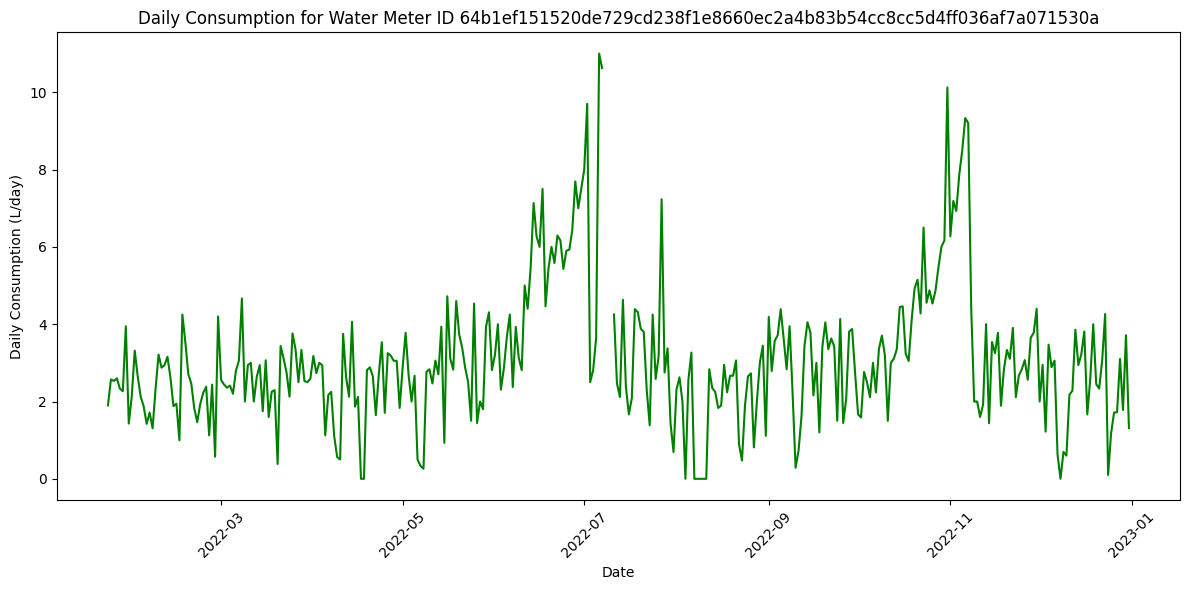

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your original DataFrame

# Convert 'Data/Fecha/Date' and 'Hora/Hora/Time' columns to datetime format and combine them
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Set 'Datetime' column as the index
data.set_index('Datetime', inplace=True)

# Specify the ID of the water meter you want to plot
desired_id = '64b1ef151520de729cd238f1e8660ec2a4b83b54cc8cc5d4ff036af7a071530a'  # Replace 123 with the actual ID you want to plot

# Filter the data for the desired ID and resample to daily frequency, calculating the mean consumption
filtered_data = data[data['ID'] == desired_id]['Consumption (L/h)'].resample('D').mean()

# Plot the daily consumption data for the specified water meter
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data.values, color='green')
plt.xlabel('Date')
plt.ylabel('Daily Consumption (L/day)')
plt.title(f'Daily Consumption for Water Meter ID {desired_id}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
